In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
! pip install prophet

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [ ]:
! pip install pmdarima
import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.1 MB/s eta 0:00:00


***Loading historical data containing gasoline vehicle counts over years***

In [14]:
path = '/content/drive/MyDrive/DATA_298B/DATA/EV_Data_HM _Count.csv'

# Define appropriate column data types
column_data_types = {'Year': str, 'Zip Code': str, 'Model Year': str, 'Fuel': str, 'Make': str, 'Duty': str, 'Vehicles': int}
vehicle_data = pd.read_csv(path, dtype=column_data_types)
# Function to replace spaces with underscores in column names
def clean_column_names(df):
    df.columns = df.columns.str.replace(' ', '_')
clean_column_names(vehicle_data)
# Saving the combined data to a new CSV file
vehicle_data.to_csv('/content/drive/MyDrive/DATA_298B/VehicleCountData/combined_vehicle_data.csv', index=False)

In [8]:
path='/content/drive/MyDrive/DATA_298B/DATA/CA_ZipCodesData.csv'
# Define appropriate column data types
column_data_types = {'zip': str, 'primary_city': str, 'state': str, 'Fuel': str, 'county': str}

zc = pd.read_csv(path, dtype=column_data_types)
zc.head()

,zip,primary_city,state,county
0,90001,Los Angeles,CA,Los Angeles County
1,90002,Los Angeles,CA,Los Angeles County
2,90003,Los Angeles,CA,Los Angeles County
3,90004,Los Angeles,CA,Los Angeles County
4,90005,Los Angeles,CA,Los Angeles County


In [18]:
vehicle_data = vehicle_data.merge(zc, left_on='Zip_Code', right_on='zip')
vehicle_data.drop(columns=['zip'], inplace=True)
new_order = ['Year', 'Fuel', 'Make' ,'Duty','Vehicles','Zip_Code', 'primary_city','state','county']
vehicle_data = vehicle_data[new_order]

In [16]:
vehicle_data.dtypes

Year          object
Zip_Code      object
Model_Year    object
Fuel          object
Make          object
Duty          object
Vehicles       int64
dtype: object

In [22]:
vehicle_data['Year'] = pd.to_datetime(vehicle_data['Year'])


In [21]:
vehicle_data.dtypes

Year            datetime64[ns]
Fuel                    object
Make                    object
Duty                    object
Vehicles                 int64
Zip_Code                object
primary_city            object
state                   object
county                  object
dtype: object

In [ ]:
print("\nSampled Data:")
print(vehicle_data.sample(10))
print("\nData Types:")
print(vehicle_data.dtypes)


Sampled Data:
           Year              Fuel       Make   Duty  Vehicles Zip_Code  \
2858 2021-01-01  Battery Electric  OTHER/UNK  Heavy         1    95402   
864  2016-01-01  Battery Electric  OTHER/UNK  Heavy         1    94043   
237  2019-01-01  Battery Electric  NEW FLYER  Heavy       189    94124   
492  2019-01-01  Battery Electric  OTHER/UNK  Heavy         6    90012   
1973 2021-01-01  Battery Electric  OTHER/UNK  Heavy         1    95932   
1369 2018-01-01  Battery Electric  OTHER/UNK  Heavy         2    93616   
2213 2020-01-01  Battery Electric  OTHER/UNK  Heavy         1    95865   
1249 2021-01-01  Battery Electric  OTHER/UNK  Heavy         1    93614   
52   2022-01-01  Battery Electric  OTHER/UNK  Heavy         1    91732   
1499 2018-01-01  Battery Electric  OTHER/UNK  Heavy         5    93623   

       primary_city state                county  
2858     Santa Rosa    CA         Sonoma County  
864   Mountain View    CA    Santa Clara County  
237   San Francisco 

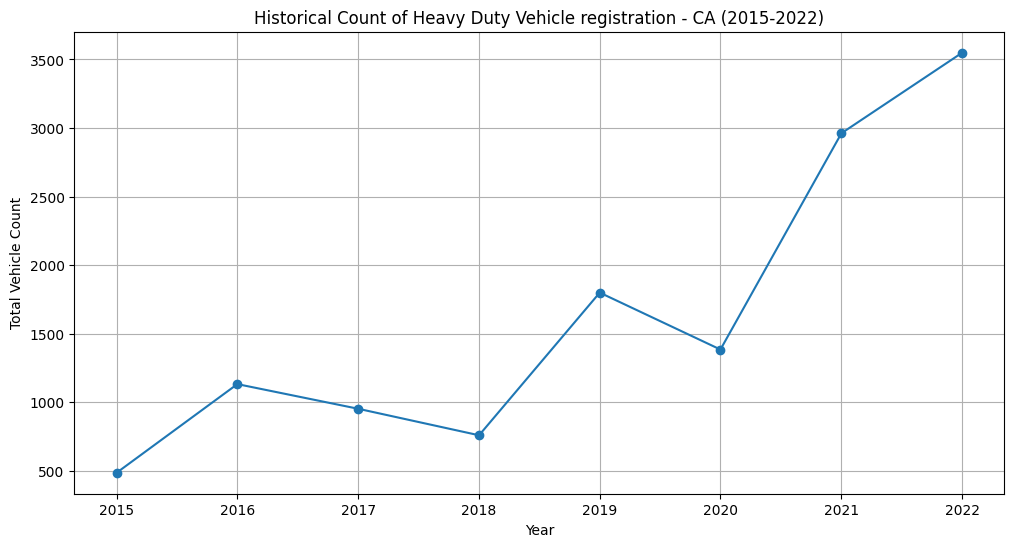

In [ ]:
# Plot the historical data
yearly_vehicle_count = vehicle_data.groupby('Year')['Vehicles'].sum()
plt.figure(figsize=(12, 6))
plt.plot(yearly_vehicle_count.index, yearly_vehicle_count.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Vehicle Count')
plt.title('Historical Count of Heavy Duty Vehicle registration - CA (2015-2022)')
plt.grid(True)
plt.show()

In [ ]:
# Rename columns for Prophet

yearly_vehicle_count = df.groupby('Year')['Vehicles'].sum().reset_index()
yearly_vehicle_count.rename(columns={'Year': 'ds', 'Vehicles': 'y'}, inplace=True)


# Create and fit a Prophet model
model = Prophet(interval_width=0.1,growth='linear',seasonality_mode='multiplicative',changepoint_prior_scale=50,seasonality_prior_scale=20)
model.fit(yearly_vehicle_count)

# Make future predictions
current_year = 2023  # Example current year
n_years = 2035 - current_year  # Calculate the number of years remaining until 2045
future = model.make_future_dataframe(periods=n_years, freq='Y')
forecast = model.predict(future)

# Extract projected values
projected_ev_counts = forecast.tail(n_years)['yhat'].values

# Print the projected EV vehicle counts for each future year
for year, count in zip(range(current_year + 1, 2036), projected_ev_counts):
    print(f"Year {year}: Projected EV Vehicle Count = {int(count)}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsqx089s/p5bmpzyb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdsqx089s/2k7zkc4q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74101', 'data', 'file=/tmp/tmpdsqx089s/p5bmpzyb.json', 'init=/tmp/tmpdsqx089s/2k7zkc4q.json', 'output', 'file=/tmp/tmpdsqx089s/prophet_modelwpou8275/prophet_model-20230919202433.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:24:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:24:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

Year 2024: Projected EV Vehicle Count = 4041
Year 2025: Projected EV Vehicle Count = 4695
Year 2026: Projected EV Vehicle Count = 5291
Year 2027: Projected EV Vehicle Count = 5896
Year 2028: Projected EV Vehicle Count = 6529
Year 2029: Projected EV Vehicle Count = 7201
Year 2030: Projected EV Vehicle Count = 7781
Year 2031: Projected EV Vehicle Count = 8379
Year 2032: Projected EV Vehicle Count = 9018
Year 2033: Projected EV Vehicle Count = 9706
Year 2034: Projected EV Vehicle Count = 10271
Year 2035: Projected EV Vehicle Count = 10863


In [25]:
def fit_and_forecast(df, interval_width, growth='linear', seasonality_mode='multiplicative', changepoint_prior_scale=50, seasonality_prior_scale=20, changepoint_range=0.8):
    # Set the uncertainty interval
    prophet = Prophet(
        interval_width=interval_width,
        growth=growth,
        seasonality_mode=seasonality_mode,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        changepoint_range=changepoint_range
    )

    prophet.fit(df)
    # Make future predictions
    current_year = 2023
    n_years = 2045 - current_year  # Calculate the number of years remaining until 2045
    future_df = prophet.make_future_dataframe(periods=24, freq='Y')
    forecast_df = prophet.predict(future_df)

    return forecast_df, prophet, future_df


# Rename columns for Prophet

yearly_vehicle_count = vehicle_data.groupby('Year')['Vehicles'].sum().reset_index()
yearly_vehicle_count.rename(columns={'Year': 'ds', 'Vehicles': 'y'}, inplace=True)


# Forecast until 2045 with the provided data
forecast_df, model, future_df = fit_and_forecast(yearly_vehicle_count, interval_width=0.95)


# Extract projected values
projected_ev_count = forecast_df.tail(30)['yhat'].values
current_year=2023
# Print the projected EV vehicle counts for each future year
for year, count in zip(range(current_year + 1, 2046), projected_ev_count):
    print(f"Year {year}: Projected EV Vehicle Count = {int(count)}")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3jsyrmvd/hs0en5no.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3jsyrmvd/t7e1i5lq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86836', 'data', 'file=/tmp/tmp3jsyrmvd/hs0en5no.json', 'init=/tmp/tmp3jsyrmvd/t7e1i5lq.json', 'output', 'file=/tmp/tmp3jsyrmvd/prophet_modeltae57rm5/prophet_model-20231214205641.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:56:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:56:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

Year 2024: Projected EV Vehicle Count = 952
Year 2025: Projected EV Vehicle Count = 759
Year 2026: Projected EV Vehicle Count = 1799
Year 2027: Projected EV Vehicle Count = 1384
Year 2028: Projected EV Vehicle Count = 2961
Year 2029: Projected EV Vehicle Count = 3548
Year 2030: Projected EV Vehicle Count = 1798
Year 2031: Projected EV Vehicle Count = 1478
Year 2032: Projected EV Vehicle Count = 4039
Year 2033: Projected EV Vehicle Count = 3751
Year 2034: Projected EV Vehicle Count = 3226
Year 2035: Projected EV Vehicle Count = 2456
Year 2036: Projected EV Vehicle Count = 6333
Year 2037: Projected EV Vehicle Count = 5617
Year 2038: Projected EV Vehicle Count = 4653
Year 2039: Projected EV Vehicle Count = 3435
Year 2040: Projected EV Vehicle Count = 8627
Year 2041: Projected EV Vehicle Count = 7483
Year 2042: Projected EV Vehicle Count = 6081
Year 2043: Projected EV Vehicle Count = 4414
Year 2044: Projected EV Vehicle Count = 10921
Year 2045: Projected EV Vehicle Count = 9349


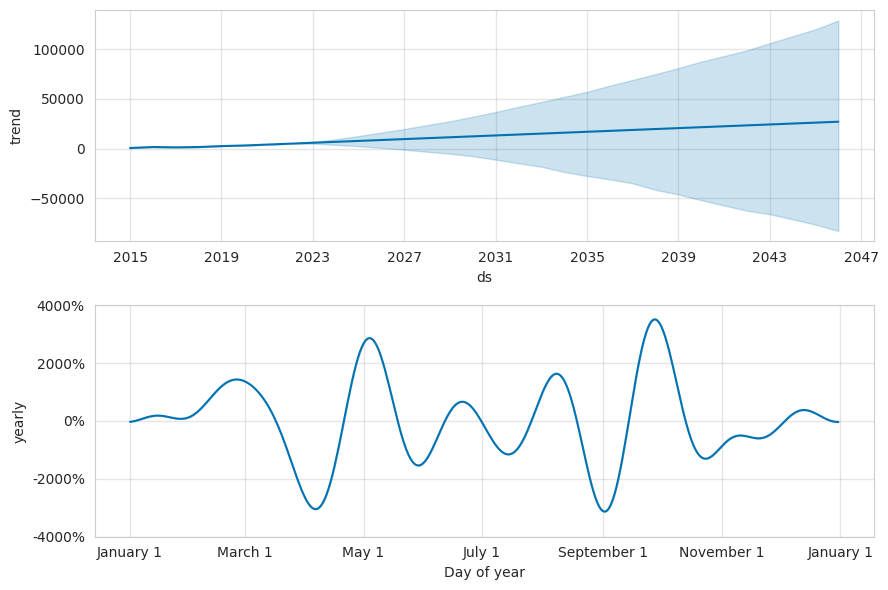

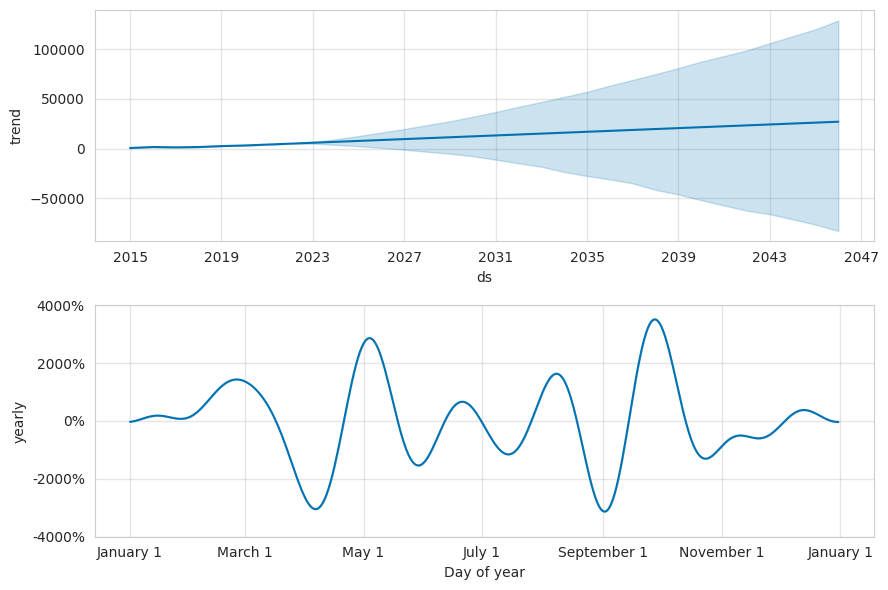

In [ ]:
model.plot_components(forecast_df)

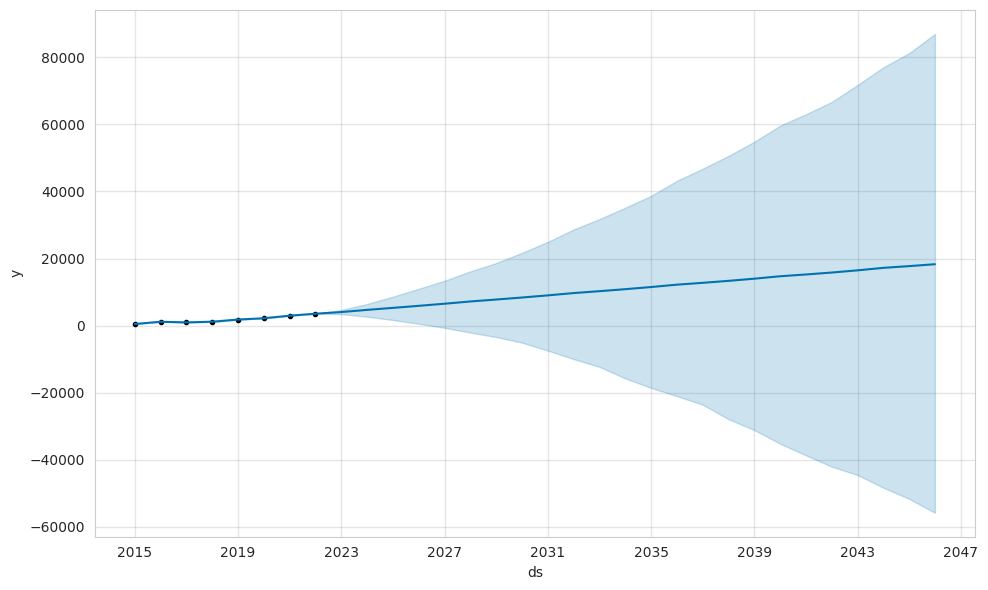

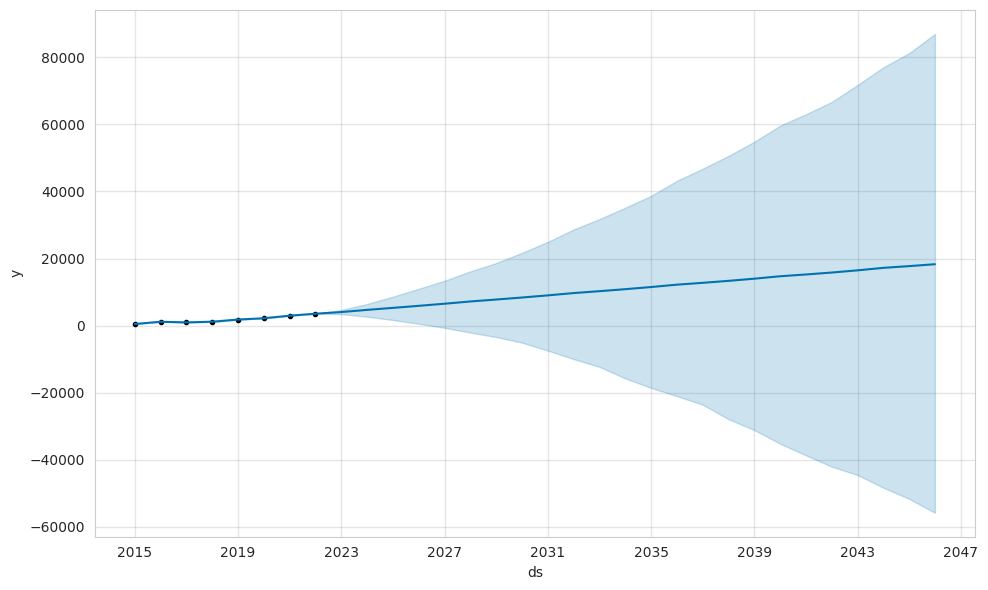

In [ ]:
model.plot(forecast_df, uncertainty=True)

In [28]:
# Group by Year and Zip_Code, and calculate the sum of Vehicles for each group
yearly_zip_vehicle_count = vehicle_data.groupby(['Year', 'Zip_Code'])['Vehicles'].sum().reset_index()
yearly_zip_vehicle_count.rename(columns={'Vehicles': 'Vehicle_Count'}, inplace=True)
yearly_zip_vehicle_count

,Year,Zip_Code,Vehicle_Count
0,2015-01-01,90018,1
1,2015-01-01,90031,1
2,2015-01-01,90212,1
3,2015-01-01,90247,21
4,2015-01-01,90249,13
...,...,...,...
2083,2022-01-01,96073,2
2084,2022-01-01,96080,1
2085,2022-01-01,96105,2
2086,2022-01-01,96120,1


In [ ]:
filtered_zip_vehicle_count

,Year,Zip_Code,Vehicle_Count
3,2015-01-01,90247,21
4,2015-01-01,90249,13
6,2015-01-01,90640,22
10,2015-01-01,90813,48
31,2015-01-01,94124,230
...,...,...,...
2044,2022-01-01,95407,13
2063,2022-01-01,95747,15
2065,2022-01-01,95812,159
2066,2022-01-01,95816,107


In [ ]:
zip_code_data = yearly_zip_vehicle_count[yearly_zip_vehicle_count['Zip_Code'] == '95133']

In [ ]:
zip_code_data

,ds,Zip_Code,y
2031,2021-01-01,95133,1


In [ ]:
# Get the top 5 zip codes with the highest vehicle count for each year
top_10_zipcodes_per_year = yearly_zip_vehicle_count.groupby('Year').apply(lambda x: x.nlargest(5, 'Vehicle_Count')).reset_index(drop=True)
print(top_10_zipcodes_per_year)

         Year Zip_Code  Vehicle_Count
0  2015-01-01    94124            230
1  2015-01-01    90813             48
2  2015-01-01    90640             22
3  2015-01-01    90247             21
4  2015-01-01    90249             13
5  2016-01-01    94124            290
6  2016-01-01    92805             71
7  2016-01-01    91405             49
8  2016-01-01    93534             46
9  2016-01-01    94305             45
10 2017-01-01    94124            288
11 2017-01-01    92805             97
12 2017-01-01    91405             49
13 2017-01-01    94305             43
14 2017-01-01    95816             34
15 2018-01-01    94606             26
16 2018-01-01    93108             18
17 2018-01-01    93603             16
18 2018-01-01    92286             15
19 2018-01-01    92599             15
20 2019-01-01    94124            322
21 2019-01-01    90012            103
22 2019-01-01    93534             64
23 2019-01-01    92805             50
24 2019-01-01    95660             42
25 2020-01-0

In [ ]:
zip_code_data

,Year,Zip_Code,Vehicle_Count
31,2015-01-01,94124,230
152,2016-01-01,94124,290
279,2017-01-01,94124,288
424,2018-01-01,94124,5
707,2019-01-01,94124,322
1561,2021-01-01,94124,298
1990,2022-01-01,94124,122


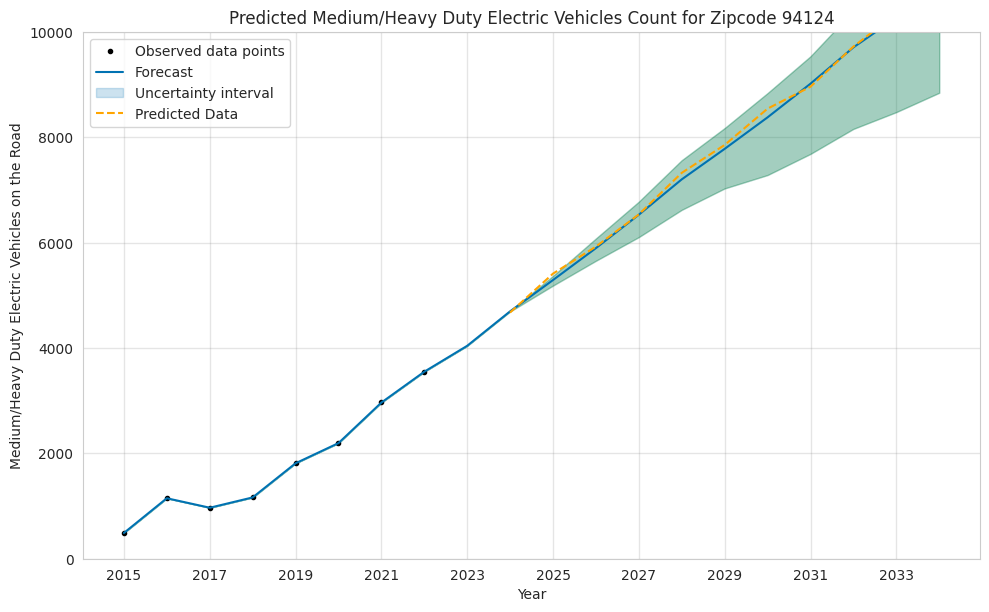

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2015-01-01,708.303766,488.996153,488.996153,708.303766,708.303766,-0.309624,-0.309624,-0.309624,-0.309624,-0.309624,-0.309624,0.0,0.0,0.0,488.996153
1,2016-01-01,1683.233663,1147.995736,1147.995736,1683.233663,1683.233663,-0.317982,-0.317982,-0.317982,-0.317982,-0.317982,-0.317982,0.0,0.0,0.0,1147.995736
2,2017-01-01,1351.201276,967.993012,967.993012,1351.201276,1351.201276,-0.283606,-0.283606,-0.283606,-0.283606,-0.283606,-0.283606,0.0,0.0,0.0,967.993012
3,2018-01-01,1658.446933,1163.994247,1163.994248,1658.446933,1658.446933,-0.298142,-0.298142,-0.298142,-0.298142,-0.298142,-0.298142,0.0,0.0,0.0,1163.994247
4,2019-01-01,2624.648202,1811.994987,1811.994987,2624.648202,2624.648202,-0.309624,-0.309624,-0.309624,-0.309624,-0.309624,-0.309624,0.0,0.0,0.0,1811.994987
5,2020-01-01,3218.387991,2194.998693,2194.998693,3218.387991,3218.387991,-0.317982,-0.317982,-0.317982,-0.317982,-0.317982,-0.317982,0.0,0.0,0.0,2194.998693
6,2021-01-01,4140.159710,2965.987185,2965.987185,4140.159710,4140.159710,-0.283606,-0.283606,-0.283606,-0.283606,-0.283606,-0.283606,0.0,0.0,0.0,2965.987185
7,2022-01-01,5059.412927,3550.989438,3550.989438,5059.412927,5059.412927,-0.298142,-0.298142,-0.298142,-0.298142,-0.298142,-0.298142,0.0,0.0,0.0,3550.989438
8,2022-12-31,5976.147641,4041.518612,4041.518612,5976.147641,5976.147641,-0.323725,-0.323725,-0.323725,-0.323725,-0.323725,-0.323725,0.0,0.0,0.0,4041.518612
9,2023-12-31,6895.400858,4692.074413,4703.593192,6890.295811,6907.211099,-0.319031,-0.319031,-0.319031,-0.319031,-0.319031,-0.319031,0.0,0.0,0.0,4695.550789


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_prophet_forecast(model, forecast, y_limits=None, plot=True, noise_std=50):
    # Plotting
    if plot:
        fig = model.plot(forecast, xlabel='Year', ylabel='Medium/Heavy Duty Electric Vehicles on the Road', figsize=(10, 6))

        if y_limits:
            plt.ylim(y_limits)


        # Add a little noise to the prediction line
        predicted_data = forecast['yhat'][forecast['ds'].dt.year > 2022]
        noise = np.random.normal(50, noise_std, len(predicted_data))
        plt.plot(forecast['ds'][forecast['ds'].dt.year > 2022],
                 predicted_data + noise,
                 label='Predicted Data', color='orange',linestyle='--')

        # Change the label names for observed points and forecast
        plt.gca().get_lines()[0].set_label('Medium/Heavy Duty EV Count')


        # Change the color of the uncertainty region to green
        plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2)

        plt.legend()

        # Add a title using matplotlib
        plt.title('Predicted Medium/Heavy Duty Electric Vehicles Count for Zipcode 94124')

        plt.show()

    return forecast

# Set your desired y-axis limits, e.g., y_limits = [0, 10000]
y_limits = [0, 10000]

# Call the function with the specified y_limits and plot=True
plot_prophet_forecast(model, forecast, y_limits=y_limits, plot=True, noise_std=50)


In [ ]:
zc_dict = {}

# Iterate through unique zip codes
for zc in df['Zip_Code'].unique():
    zc_data = df[df['Zip_Code'] == zc]
    cumulative_sum = zc_data.groupby('Year').size().cumsum()
    zc_dict[zc] = cumulative_sum

#filling null values created by resampling with 0's
df_ev_zc = pd.DataFrame(zc_dict)
df_ev_zc.fillna(0, inplace=True)
df_ev_zc['Total_EV_Count'] = df_ev_zc.sum(axis=1)
df_ev_zc



,90018,90031,90212,90247,90249,90503,90640,90650,90701,90706,...,95157,95306,95330,95334,95553,95822,96105,97211,98011,Total_EV_Count
Year,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0
2016-01-01,0.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.0
2017-01-01,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,342.0
2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,461.0
2019-01-01,0.0,5.0,0.0,0.0,0.0,0.0,6.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,767.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,882.0
2021-01-01,0.0,7.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0
2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1205.0


In [ ]:
imp_zc=top_10_zipcodes_per_year['Zip_Code'].unique()
df_ev_zc = df_ev_zc.reset_index()
df_final = df_ev_zc.loc[:, ['Year', *imp_zc]]
df_final

,Year,94124,90813,90640,90247,90249,92805,91405,93534,94305,...,94580,93103,95117,94141,93625,92806,94928,92101,95812,94612
0,2015-01-01,3.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-01,9.0,2.0,3.0,0.0,0.0,3.0,3.0,5.0,5.0,...,0.0,2.0,0.0,0.0,4.0,0.0,0.0,1.0,2.0,1.0
2,2017-01-01,12.0,3.0,0.0,0.0,0.0,7.0,6.0,7.0,10.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
3,2018-01-01,13.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-01,19.0,6.0,6.0,0.0,0.0,9.0,0.0,13.0,13.0,...,3.0,4.0,0.0,0.0,7.0,1.0,0.0,3.0,5.0,3.0
5,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,8.0,3.0,6.0,8.0,2.0,0.0,0.0,0.0,5.0
6,2021-01-01,26.0,7.0,0.0,0.0,0.0,11.0,7.0,15.0,0.0,...,0.0,9.0,0.0,0.0,14.0,6.0,2.0,5.0,6.0,6.0
7,2022-01-01,31.0,0.0,9.0,0.0,0.0,16.0,0.0,19.0,0.0,...,7.0,0.0,0.0,0.0,15.0,0.0,0.0,6.0,9.0,9.0


In [26]:
def separate_data_by_zc(zc, df):
    df_zc = pd.DataFrame(df.loc[:, Zip_Code])
    df_zc.columns=["Heavy Duty EV's on the Road"]
    df_zc.head()
    return df_zc

In [29]:
from sklearn.model_selection import train_test_split

def split_data_by_zip_code(data, zip_code, test_size=0.2, random_state=None):
    # Filter data for the specified zip code
    zip_code_data = data[data['Zip_Code'] == zip_code]

    # Split the data into training and testing sets
    train_data, test_data = train_test_split(zip_code_data, test_size=test_size, random_state=random_state)

    return train_data, test_data

train_data, test_data = split_data_by_zip_code(yearly_zip_vehicle_count, '94124', test_size=0.2, random_state=42)


In [30]:
# Function to Evaluate Model
def evaluate_model(model):
    display(model.summary())
    model.plot_diagnostics()
    plt.tight_layout();

# Function to get Forecasts
def get_forecast(model, train_data, test_data, plot=True):

    forecast_df = model.get_forecast(steps=len(test_data)).conf_int()
    forecast_df.columns = ['Lower Confidence Interval',
                              'Upper Confidence Interval']
    forecast_df['Forecasts'] = model.get_forecast(steps=len(test_data))\
    .predicted_mean
    #plotting
    if plot==True:
        with plt.style.context('seaborn-whitegrid'):
            fig, ax = plt.subplots(figsize=(15, 10))
            sns.lineplot(data=train_data, color='black', ax=ax)
            sns.lineplot(data=forecast_df, x=forecast_df.index,
                         y='Forecasts', color='blue', ax=ax,
                         label='Forecasted Data', ls='--')
            sns.lineplot(data=test_data, color='purple', ax=ax,
                         label='Actual Data', ls='-.')
            ax.fill_between(forecast_df.index,
                            y1=forecast_df['Lower Confidence Interval'],
                            y2=forecast_df['Upper Confidence Interval'],
                            color = 'green', alpha=0.3,
                            label='Confidence Interval')
            ax.set_xlabel('Year')
            ax.legend(loc=2)
            plt.show();
    return forecast_df

# Function to get Predictions
def get_prediction(model, df, test_data, zipcode, plot=True):

    #creating a df with the prediction information
    prediction_df = model.get_forecast(steps=len(test_data)).conf_int()
    prediction_df.columns = ['Lower Confidence Interval',
                              'Upper Confidence Interval']
    prediction_df['Predictions'] = model.get_forecast(steps=len(test_data))\
    .predicted_mean
    #plotting
    if plot==True:
        with plt.style.context('seaborn-whitegrid'):
            fig, ax = plt.subplots(figsize=(15, 10))
            sns.lineplot(data=df, ax=ax)
            sns.lineplot(data=prediction_df, x=prediction_df.index,
                         y='Predictions', color='orange', ax=ax,
                         label='Predicted Data', ls='--')
            ax.fill_between(prediction_df.index,
                            y1=prediction_df['Lower Confidence Interval'],
                            y2=prediction_df['Upper Confidence Interval'],
                            color = 'green', alpha=0.3,
                            label='Confidence Interval')
            ax.set_xlabel('Year')
            ax.set_ylabel('Heavy Duty Electric Vehicles on the Road')
            ax.set_title(f'Predicted Electric Vehicle Count for {zipcode}')
            plt.show();
    return prediction_df